### 딥러닝 모델을 정의하는(만드는) 3가지 방법: 밀 씨앗 데이터 분류

#### 데이터 가져오기

In [2]:
# 로컬 파일에서 데이터 가져오기

# 줄별로 열 개수 확인해보기(이를 통해 seeds_dataset은 공백과 탭이 섞여 있어 각 열을 제대로 인식하지 못하는 부분이 있음을 확인 가능)
with open('../seeds_dataset.txt', 'r') as f:
    for i, line in enumerate(f, 1):
        fields = line.strip().split('\t')
        if len(fields) != 8:
            print(f'Line {i}: {len(fields)} fields → {fields}')

import pandas as pd

# 데이터 불러오기 (구분자가 탭과 공백 둘이 섞여있는 경우 sep='\s+'로 둘 모두 구분자로 인식하도록 할 수 있음)
df = pd.read_csv('../seeds_dataset.txt', sep='\s+', header=None)

print(df.head())  # 데이터 확인

Line 8: 10 fields → ['14.11', '14.1', '0.8911', '5.42', '3.302', '2.7', '', '5', '', '1']
Line 36: 10 fields → ['16.12', '15', '', '0.9', '', '5.709', '3.485', '2.27', '5.443', '1']
Line 61: 9 fields → ['11.42', '12.86', '0.8683', '5.008', '2.85', '2.7', '', '4.607', '1']
Line 69: 9 fields → ['14.37', '14.39', '0.8726', '5.569', '3.153', '1.464', '5.3', '', '1']
Line 107: 9 fields → ['18.85', '16.17', '0.9056', '6.152', '3.806', '2.843', '6.2', '', '2']
Line 136: 9 fields → ['15.38', '14.66', '0.899', '5.477', '3.465', '3.6', '', '5.439', '2']
Line 170: 9 fields → ['11.24', '13', '', '0.8359', '5.09', '2.715', '3.521', '5.088', '3']
Line 171: 9 fields → ['11.02', '13', '', '0.8189', '5.325', '2.701', '6.735', '5.163', '3']
Line 173: 9 fields → ['11.27', '12.97', '0.8419', '5.088', '2.763', '4.309', '5', '', '3']
Line 202: 9 fields → ['12.67', '13.32', '0.8977', '4.984', '3.135', '2.3', '', '4.745', '3']
Line 204: 9 fields → ['12.7', '13.41', '0.8874', '5.183', '3.091', '8.456', '5', ''

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jt341\AppData\Local\Temp\ipykernel_34512\3273261745.py:13: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('../seeds_dataset.txt', sep='\s+', header=None)


In [3]:
# 데이터 train, test 나누기

from sklearn.model_selection import train_test_split  # 데이터 분할 함수
from sklearn.preprocessing import StandardScaler  # 데이터 표준화 함수

# [데이터 제작]
# 특징(X)과 레이블(y) 분리
X = df.iloc[:, :-1].values  # 마지막 열 제외
y = df.iloc[:, -1].values   # 마지막 열 (레이블)

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)

[[ 1.42097769e-01  2.15462437e-01  6.06017918e-05 ...  1.41701823e-01
  -9.86151745e-01 -3.83577423e-01]
 [ 1.11880257e-02  8.22375713e-03  4.28515270e-01 ...  1.97432229e-01
  -1.78816620e+00 -9.22013487e-01]
 [-1.92066576e-01 -3.60200562e-01  1.44238325e+00 ...  2.08047544e-01
  -6.67479334e-01 -1.18919199e+00]
 ...
 [-5.67570840e-01 -6.90247348e-01  7.33948301e-01 ... -7.06044846e-02
   3.07658816e+00 -7.18060432e-01]
 [-1.03608992e+00 -1.03564515e+00 -8.01701104e-01 ... -1.12152071e+00
  -6.81351965e-02 -7.42534799e-01]
 [-8.77620233e-01 -9.35863561e-01 -1.10234659e-01 ... -7.55292327e-01
   1.29122264e+00 -7.03783718e-01]]


#### 딥러닝 시작

In [4]:
# 원-핫 인코딩, 딥러닝 입력을 위해 Numpy로 변환

Y = pd.get_dummies(y).values # 원-핫 인코딩
    # pd.get_dummies(y): y의 각 클래스를 원-핫 벡터로 변환
    # .values: DataFrame을 Numpy 배열로 변환
print(Y[:5])

# X = X.values # 딥러닝 입력을 위해 Numpy로 변환(but X는 이미 Numpy 배열이기 때문에 변환할 필요 없음)
    # scaler = StandardScaler()
    # X = scaler.fit_transform(X)
    # 이 두 줄 코드에서 StandardScaler()가 X를 Numpy로 이미 변환시켰음
print(X[:5])

[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]
[[ 1.42097769e-01  2.15462437e-01  6.06017918e-05  3.04218199e-01
   1.41701823e-01 -9.86151745e-01 -3.83577423e-01]
 [ 1.11880257e-02  8.22375713e-03  4.28515270e-01 -1.68624664e-01
   1.97432229e-01 -1.78816620e+00 -9.22013487e-01]
 [-1.92066576e-01 -3.60200562e-01  1.44238325e+00 -7.63637453e-01
   2.08047544e-01 -6.67479334e-01 -1.18919199e+00]
 [-3.47091272e-01 -4.75333162e-01  1.03938133e+00 -6.88978054e-01
   3.19508356e-01 -9.60817955e-01 -1.22998260e+00]
 [ 4.45257175e-01  3.30595037e-01  1.37450924e+00  6.66655647e-02
   8.05159035e-01 -1.56349549e+00 -4.75356297e-01]]


In [5]:
# train, test 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((168, 7), (168, 3), (42, 7), (42, 3))

#### 모델 정의 1 - 모델 층 쌓기

In [6]:
# 모델 정의하기(만들기)

from keras.models import Sequential # 신경망 모델: 층을 순차적으로 쌓는 방식
from keras.layers import Dense # 완전 연결 레이어
from keras.optimizers import SGD,Adam # 최적화 알고리즘

model = Sequential()

model.add(Dense(10,input_shape=(7,),activation='relu')) # 입력층
    # input_shape=(,13): 데이터의 특성 개수가 13개
    # Dense(10, ...): 이 층이 출력으로 뽑는 노드(특성)가 10개
model.add(Dense(6,activation='relu')) # 은닉층
model.add(Dense(3,activation='softmax')) # 출력층(마지막 레이어)
    # 출력층 노드가 a개: a개의 답 중 하나를 분류하는 문제라는 의미

model.compile(Adam(learning_rate=0.02),'categorical_crossentropy',metrics=['accuracy'])
    # *learning_rate 대신 lr을 사용하면 오류: 최신 버전은 learning_rate 속성만 지원
model.summary()
    # 출력으로 나오는 Params: 파라미터. AI 모델의 내부 변수. 이 변수에 의해 입력값이 원하는 출력값으로 만들어 짐. 가중치(w)와 비슷한 것.

c:\Users\jt341\anaconda3\envs\2025AI\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167 (668.00 B)

 Trainable params: 167 (668.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

import numpy as np

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2500 - loss: 1.1477 - val_accuracy: 0.6429 - val_loss: 0.8370
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6392 - loss: 0.8063 - val_accuracy: 0.8571 - val_loss: 0.7147
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8258 - loss: 0.7082 - val_accuracy: 0.8810 - val_loss: 0.6290
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8236 - loss: 0.6103 - val_accuracy: 0.8333 - val_loss: 0.5186
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8659 - loss: 0.4861 - val_accuracy: 0.8333 - val_loss: 0.4155
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8784 - loss: 0.3540 - val_accuracy: 0.8333 - val_loss: 0.3379
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9079 - loss: 0.3014 - val_accuracy: 0.8810 - val_loss: 0.2732
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9406 - loss: 0.2604 - val_accuracy: 0.9048 - val_loss: 0.2608


#### 모델 정의 2 - 함수형 API 이용

In [8]:
# 모델 정의하기(만들기)

from keras.models import Model # 신경망 모델: 층을 순차적으로 쌓는 방식
from keras.layers import Dense,Input # 완전 연결 레이어
from keras.optimizers import Adam # 최적화 알고리즘

inputs = Input(shape=(7,))
    # shape=(7,): 데이터의 특성 개수가 7개
x1 = Dense(10, activation='relu')(inputs)
    # Dense(10, ...): 이 층이 출력으로 뽑는 노드(특성)가 10개
x2 = Dense(6, activation='relu')(x1)
prediction = Dense(3, activation='softmax')(x2)
    # 출력층 노드가 a개: a개의 답 중 하나를 분류하는 문제라는 의미
    
model2 = Model(inputs=inputs, outputs=prediction)

model2.compile(Adam(learning_rate=0.02),'categorical_crossentropy',metrics=['accuracy'])

model2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167 (668.00 B)

 Trainable params: 167 (668.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_history2=model2.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model2.predict(X_test)

import numpy as np

y_test_class2 = np.argmax(y_test,axis=1)
y_pred_class2 = np.argmax(y_pred,axis=1)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5089 - loss: 1.0162 - val_accuracy: 0.8333 - val_loss: 0.5104
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8493 - loss: 0.4676 - val_accuracy: 0.8571 - val_loss: 0.3095
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8919 - loss: 0.3198 - val_accuracy: 0.9048 - val_loss: 0.2227
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9388 - loss: 0.1908 - val_accuracy: 0.9524 - val_loss: 0.2341
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9346 - loss: 0.2545 - val_accuracy: 0.9524 - val_loss: 0.2638
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9361 - loss: 0.1679 - val_accuracy: 0.9524 - val_loss: 0.2634
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9358 - loss: 0.1557 - val_accuracy: 0.9524 - val_loss: 0.2575
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9378 - loss: 0.1402 - val_accuracy: 0.9524 - val_loss: 0.2549


#### 모델 정의 3 - Model 클래스 상속

In [10]:
# 모델 정의하기(만들기)

from keras.models import Model # 신경망 모델: 층을 순차적으로 쌓는 방식
from keras.layers import Dense # 완전 연결 레이어
from keras.optimizers import Adam # 최적화 알고리즘

class ModelClass(Model):  # Model 클래스 상속
    def __init__(self, num_classes):
        """
            num_classes: 분류해야 하는 클래스 수
        """
        super(ModelClass, self).__init__(name='mlp')
        self.num_classes = num_classes
        
        self.dense1 = Dense(10, activation='relu')
        self.dense2 = Dense(6, activation='relu')
        self.dense3 = Dense(num_classes, activation='softmax')
        
    def call(self, inputs):  # 입력층에서 입력
        x = self.dense1(inputs)  # 은닉층
        x = self.dense2(x)  # 은닉층
        return self.dense3(x)  # 출력층
    
model3 = ModelClass(num_classes=3)

model3.compile(Adam(learning_rate=0.02),'categorical_crossentropy',metrics=['accuracy'])

# Model 클래스를 상속해 정의한 모델은 input shape를 정의하지 않음(학습할 때 자동으로 들어감)
# 그렇기 때문에 model.summary()로 모델 구조를 볼 수 없음
# model3.build(input_shape=(7,))  # 얘를 써서 넣을 입력값의 구조를 넣어 build해 주면 summary()가 작동한다는데 안 되네

model3.summary()

Model: "mlp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_history3=model3.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model3.predict(X_test)

import numpy as np

y_test_class3 = np.argmax(y_test,axis=1)
y_pred_class3 = np.argmax(y_pred,axis=1)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5722 - loss: 0.8872 - val_accuracy: 0.8810 - val_loss: 0.4875
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8683 - loss: 0.4399 - val_accuracy: 0.9286 - val_loss: 0.2764
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8871 - loss: 0.2751 - val_accuracy: 0.9286 - val_loss: 0.2693
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9103 - loss: 0.2227 - val_accuracy: 0.9048 - val_loss: 0.2927
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9144 - loss: 0.1872 - val_accuracy: 0.9048 - val_loss: 0.3470
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9349 - loss: 0.2149 - val_accuracy: 0.8810 - val_loss: 0.2702
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9228 - loss: 0.1732 - val_accuracy: 0.9286 - val_loss: 0.2641
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9181 - loss: 0.1877 - val_accuracy: 0.9048 - val_loss: 0.2734


#### 모델 평가

In [12]:
#Accuracy of the predicted values

from sklearn.metrics import classification_report,confusion_matrix

test_classes = [y_test_class, y_test_class2, y_test_class3]
pred_classes = [y_pred_class, y_pred_class2, y_pred_class3]

for i in range(len(test_classes)):
    print(f"\n-----------[model {i + 1}]-----------")
    print(classification_report(test_classes[i], pred_classes[i]))
    print(confusion_matrix(test_classes[i], pred_classes[i]))


-----------[model 1]-----------
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.81      0.90        16
           2       1.00      1.00      1.00        13

    accuracy                           0.93        42
   macro avg       0.94      0.94      0.93        42
weighted avg       0.94      0.93      0.93        42

[[13  0  0]
 [ 3 13  0]
 [ 0  0 13]]

-----------[model 2]-----------
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.81      0.90        16
           2       1.00      1.00      1.00        13

    accuracy                           0.93        42
   macro avg       0.94      0.94      0.93        42
weighted avg       0.94      0.93      0.93        42

[[13  0  0]
 [ 3 13  0]
 [ 0  0 13]]

-----------[model 3]-----------
              precision    recall  f1-score   support

          

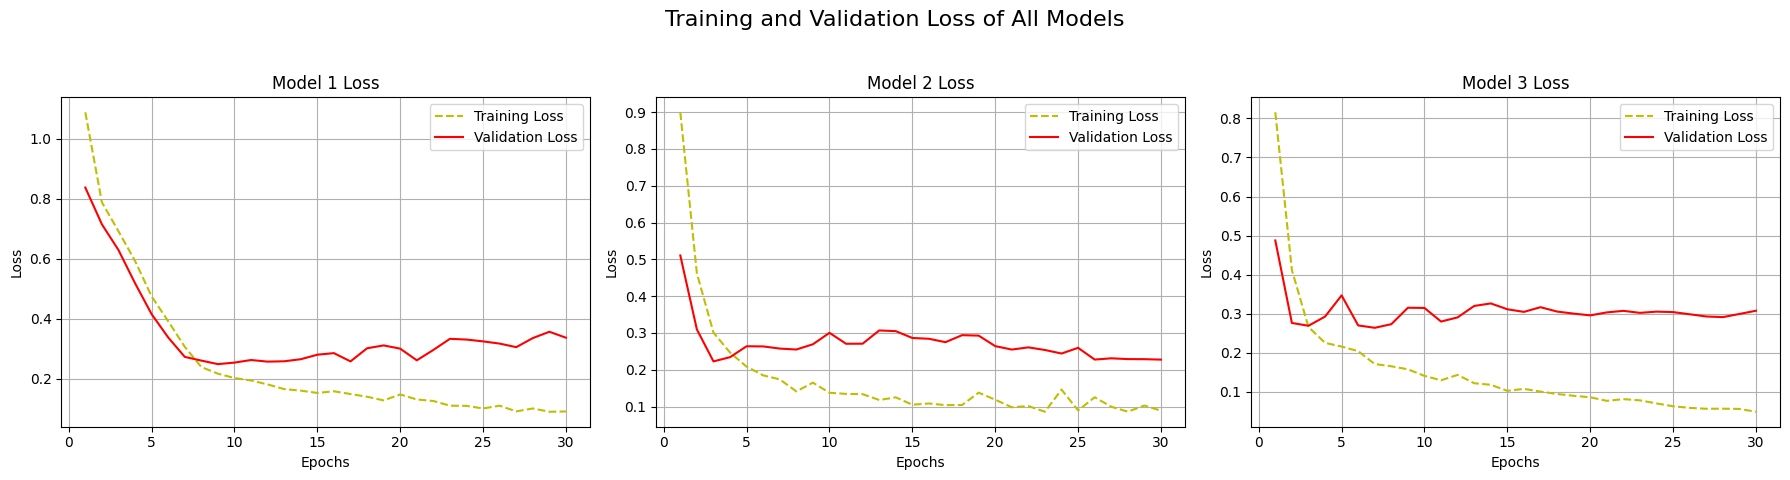

In [15]:
# 3개 모델 한꺼번에 시각화하기

import matplotlib.pyplot as plt

# 모델과 이름 정리
histories = [model_history, model_history2, model_history3]
model_labels = ['Model 1', 'Model 2', 'Model 3']
colors = ['blue', 'green', 'purple']

# ---------- Loss subplot ----------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 각 그래프를 넣을 1행 3열 칸

for i, history in enumerate(histories):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    axes[i].plot(epochs, loss, 'y--', label='Training Loss')
    axes[i].plot(epochs, val_loss, 'r-', label='Validation Loss')
    axes[i].set_title(f'{model_labels[i]} Loss')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Loss')
    axes[i].legend()
    axes[i].grid(True)

fig.suptitle('Training and Validation Loss of All Models', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

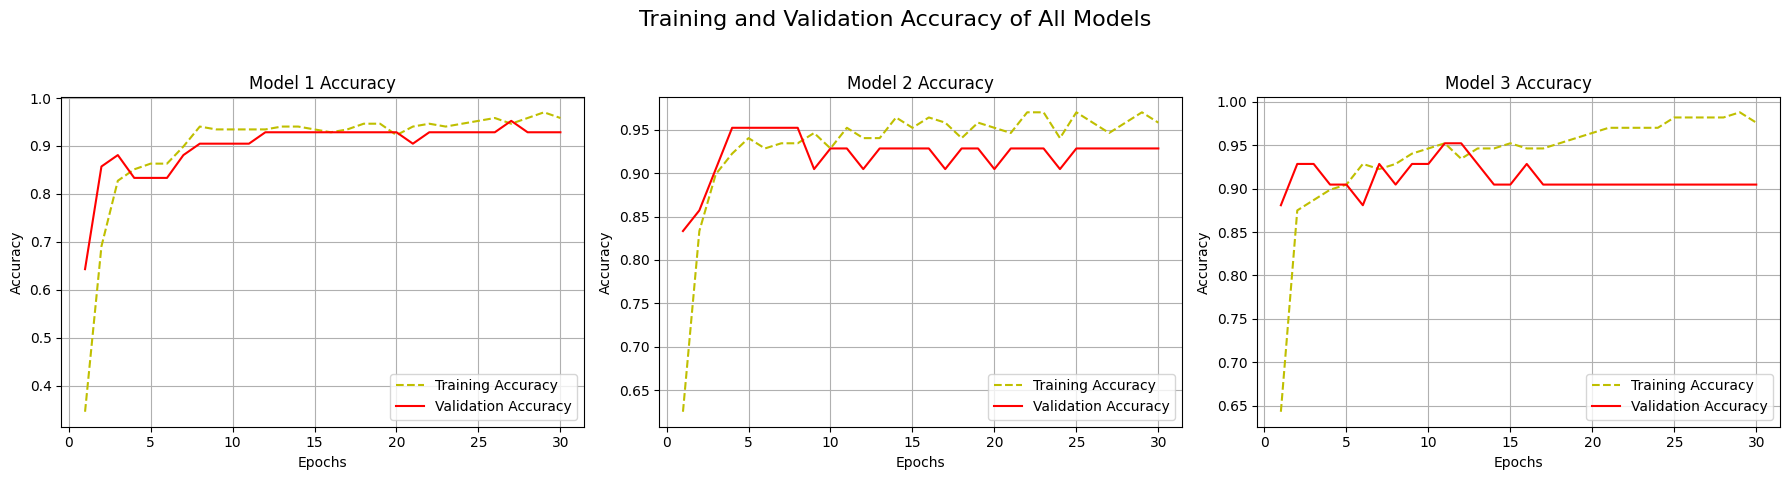

In [16]:
# ---------- Accuracy subplot ----------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 각 그래프를 넣을 1행 3열 칸

for i, history in enumerate(histories):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    
    axes[i].plot(epochs, acc, 'y--', label='Training Accuracy')
    axes[i].plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    axes[i].set_title(f'{model_labels[i]} Accuracy')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()
    axes[i].grid(True)

fig.suptitle('Training and Validation Accuracy of All Models', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()